In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Load built-in dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # 0 = malignant, 1 = benign

In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Predictions & accuracy
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {acc:.4f}")

Random Forest Accuracy: 0.9649


In [7]:
# Feature Importance
importances = rf.feature_importances_
feat_imp = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)

In [8]:
print("\nTop Features influencing classification:")
print(feat_imp.head(10))  # show top 10


Top Features influencing classification:
                 Feature  Importance
23            worst area    0.153892
27  worst concave points    0.144663
7    mean concave points    0.106210
20          worst radius    0.077987
6         mean concavity    0.068001
22       worst perimeter    0.067115
2         mean perimeter    0.053270
0            mean radius    0.048703
3              mean area    0.047555
26       worst concavity    0.031802


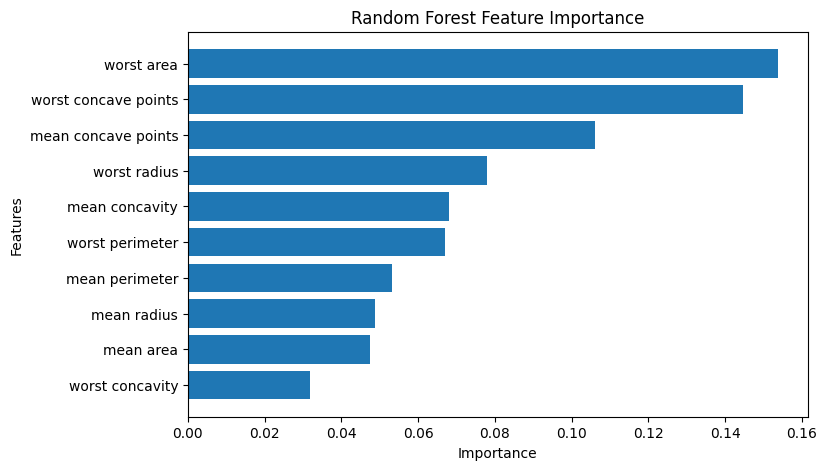

In [9]:
# Plot feature importance
plt.figure(figsize=(8,5))
plt.barh(feat_imp["Feature"].head(10), feat_imp["Importance"].head(10))
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()
